# Functions

Useful functions for plotting and analysis defined here

In [1]:
zscore <- dget("zscore.r")
plot.bars <- dget("plot_bars.r")
plot.cis <- dget("plot_cis.r")

# Read in data

Data files have been pre-processed with outliers removed, in each study stand-alone directory (TwoSource_CR_Passive, OneClose15, OneClose25). Each directory has its own notebook explaining this process and preliminary analyses. The outputs for these analyses are in the "summary" subdirectory in each directory. I just concatenated them here in the files "all_nimp" (all data excluding subjects with impossible boundary value) and "all_noo.csv" (all data excluding impossible values and outliers).

Implicit category boundaries were estimated by fitting logistic regression curves to each subject's categorization decisions across a fixed grid of stimuli and finding the stimulus point where the curve predicts equal likelihood of each category. Because this estimate can be strongly affected by a few errors or random responding near the poles, we conducted an outlier analysis that removed subjects whose boundary estimates were very far from the group mean. Outlier analysis in each case followed the same procedure: First subjects with impossible boundary values (less than 0 or greater than 300) in either test were removed. Next subjects with a test-1 boundary estimate more than 2.5 standard deviations from the mean across all subjects (since all subjects had the exact same experience to this point). From remaining subjects, I also removed those whose aligned boundary shift was more than 2.5 standard deviations from the mean.

The classification parameter estimates from grid 1 and grid 2 and all additional relevant fields for data with no outliers ("noo") were exported as csv files and copied to the current directory. Because the data span experiments over many months, field names and orderings may be different across studies. In Excel I aligned all fields across studies, merged the data into a single csv file, and named the fields consistently.

In [6]:
zthresh=2.5 #Set threshold for outlier removal

Read in data and plot test 1 and test 2 boundaries to make sure there are no impossible values:

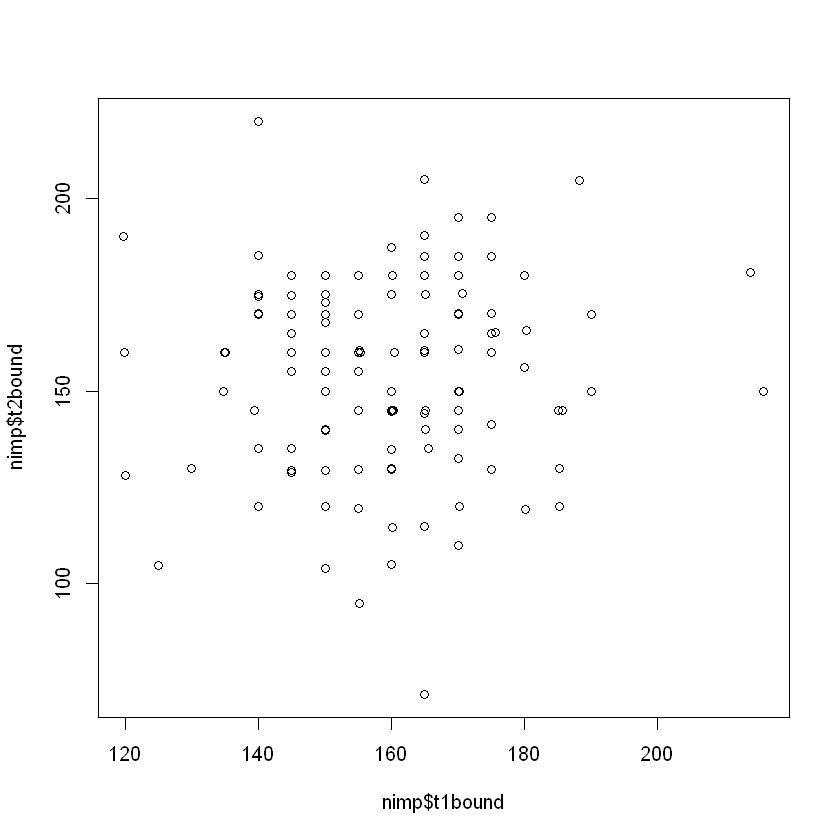

In [7]:
nimp <- read.csv("all_nimp.csv", header = T)
plot(nimp$t1bound, nimp$t2bound)

There are no impossible values. Now look for outliers in test-1 data.

In the "aligned" shift data, the direction of shift was multiplied by -1 for participants whose close source was smaller (to the left) than the range midpoint, so that a positive number always indicates a shift toward the close source pole for all subjects. So, we should do the same "flip" on the aligned boundary shift measured for an arbitrary half of the control (no source) subjects. Here we flip the sign on the shift for odd numbered control subjects (FaceLeft = 1 for all odd-numbered subjects).

In [4]:
nimp$alshift[is.na(nimp$closebound) & nimp$FaceLeft==1] <- -1 * nimp$alshift[is.na(nimp$closebound) & nimp$FaceLeft==1]

Now plot to see if there are any outliers

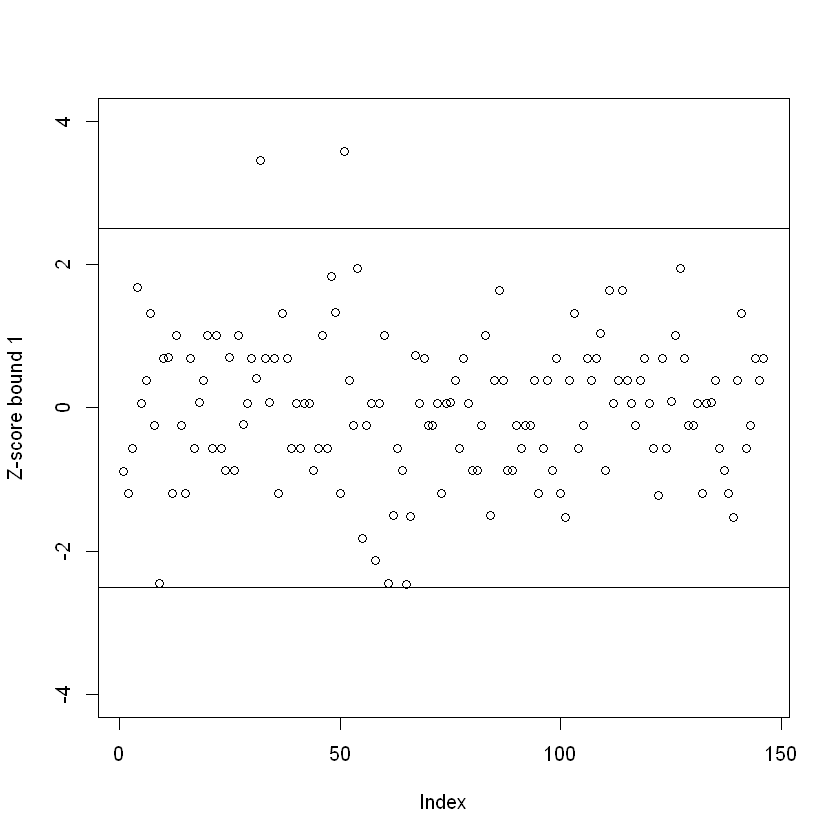

In [8]:
plot(zscore(nimp$t1bound), ylim = c(-4,4), ylab="Z-score bound 1")
abline(h = c(-zthresh,zthresh))

Remove any outliers and store in "no outlier" (noo) object

In [9]:
aggregate(t1bound ~ cond, FUN="length", data = nimp)

cond,t1bound
none,38
one15,35
one25,33
two15,40


In [10]:
noo <- nimp[abs(zscore(nimp$t1bound)) < zthresh,] #remove t1bound outliers
dim(nimp)
dim(noo)

[1] 146  17

[1] 144  17

Now compute Z scores for aligned boundary shift for each condition and plot

In [11]:
#Zscore aligned shift by condition
noo$Zalshift[noo$cond=="none"] <- zscore(noo$alshift[noo$cond=="none"])
noo$Zalshift[noo$cond=="one25"] <- zscore(noo$alshift[noo$cond=="one25"])
noo$Zalshift[noo$cond=="one15"] <- zscore(noo$alshift[noo$cond=="one15"])
noo$Zalshift[noo$cond=="two15"] <- zscore(noo$alshift[noo$cond=="two15"])

[1] -2.911489  2.861487

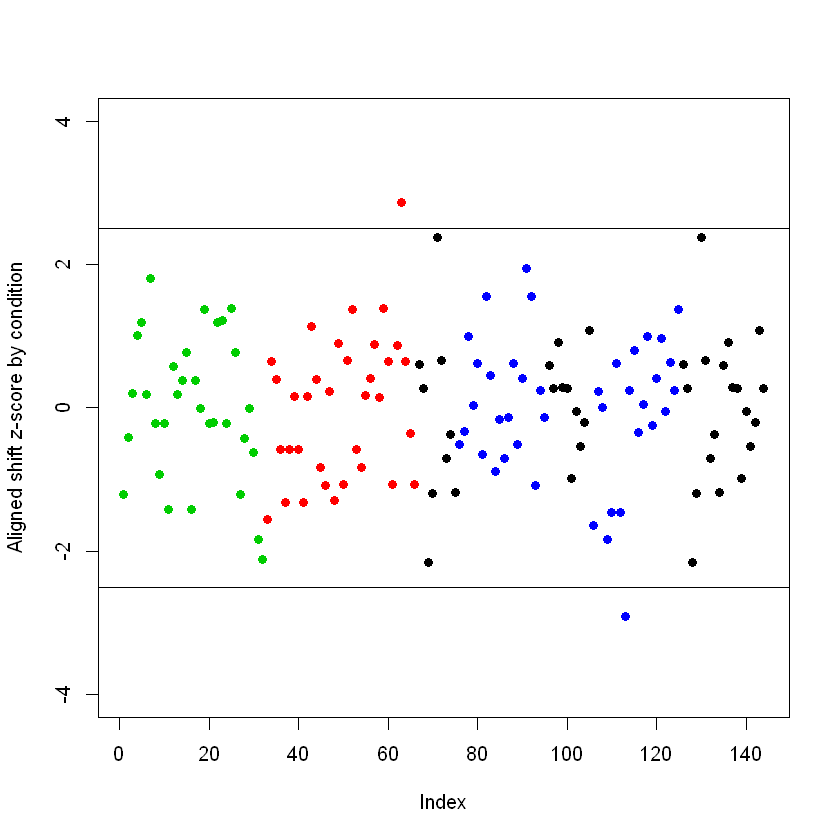

In [12]:
#plot the z-scored aligned shift
plot(noo$Zalshift, ylim =c(-4,4), pch=16, col=noo$cond,
     ylab="Aligned shift z-score by condition")
abline(h=c(-zthresh, zthresh))
range(noo$Zalshift)

Remove outliers for z-scored boundary shift

In [13]:
noo <- noo[abs(noo$Zalshift) < zthresh,]
dim(noo)

[1] 142  17

Here is the total number of subjects removed in above steps:

In [14]:
dim(nimp)[1] - dim(noo)[1]

[1] 4

## Data analysis

Where is the initial boundary on average?

In [15]:
t.test(noo$t1bound)


	One Sample t-test

data:  noo$t1bound
t = 131.89, df = 141, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 156.0603 160.8099
sample estimates:
mean of x 
 158.4351 


Initial boundary across all subjects is shifted a little positive from the midpoint between labeled examples at 150.

Is the aligned boundary shift normally distributed?

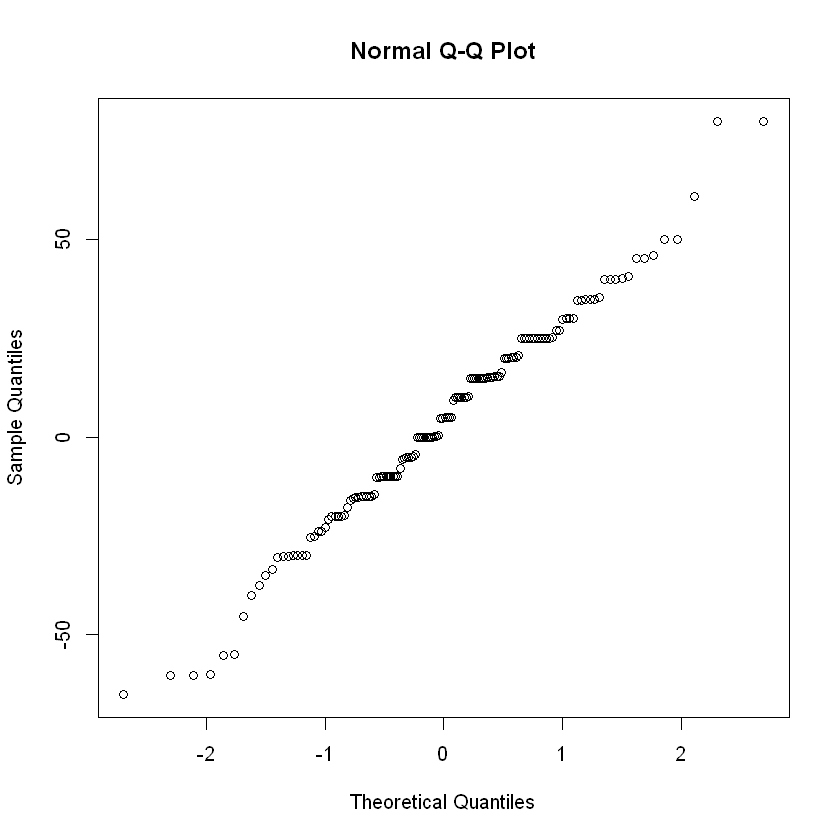

In [16]:
qqnorm(noo$alshift)

In [17]:
shapiro.test(noo$alshift)


	Shapiro-Wilk normality test

data:  noo$alshift
W = 0.98829, p-value = 0.2768


Aligned boundary shift is normally distributed. Does the mean shift differ in each condition relative to the "no source" control condition?

In [18]:
summary(lm(alshift ~ cond, data = noo))


Call:
lm(formula = alshift ~ cond, data = noo)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.724 -15.554   4.295  15.178  73.541 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.459      4.062   1.590 0.114094    
condone15      3.618      5.958   0.607 0.544621    
condone25      8.951      6.007   1.490 0.138511    
condtwo15    -20.904      5.707  -3.663 0.000355 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.04 on 138 degrees of freedom
Multiple R-squared:  0.179,	Adjusted R-squared:  0.1611 
F-statistic: 10.03 on 3 and 138 DF,  p-value: 5.071e-06


Compared to control, the one-source 25 condition shift is reliably more positive while the two-source15 condition is reliably more negative. Since the two-source15 and one-source15 are matched for the location of the close source, it is important to assess whether the shift is different in these two conditions.

In [19]:
t.test(alshift ~ cond, data = subset(noo, noo$cond=="one15" | noo$cond=="two15"))


	Welch Two Sample t-test

data:  alshift by cond
t = 4.9954, df = 69.134, p-value = 4.233e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 14.72964 34.31565
sample estimates:
mean in group one15 mean in group two15 
           10.07700           -14.44565 


Yes, they are reliably different.

Now we can compute confidence intervals for the amount of (aligned) shift observed in each condition.

The following creates a matrix o in which each column is one experiment condition, and rows contain each subject's aligned boundary shift data, padded with NAs. This matrix can be used with plot.cis to generate confidence interval plots by condition.

In [20]:
f <- factor(noo$cond, levels = levels(noo$cond)[c(3,2,1,4)]) #Copy condition factor to f with factor levels re-ordered
l <- levels(f) #factor levels
n <- max(summary(f)) #largest number of subjects in any condition
o <- matrix(NA, n, length(l)) #Create output matrix populated with NA values
for(i1 in c(1:length(l))){ #for each factor
    tmp <- noo$alshift[noo$cond==l[i1]] #copy aligned shift data for subjects in a given condition
    length(tmp) <- n #Set the length equal to the largest condition
    o[,i1] <- tmp}   #copy the data into the corresponding column of o
rm(tmp, l, n)        #remove temporary objects

Now each column of o contains the aligned boundary shift data for each condition, in the order: One 25, One 15, None, Two (15, -100). This object can be handed to the plot.cis function for plotting.

In [21]:
t.test(noo$alshift[noo$cond=="one15"])


	One Sample t-test

data:  noo$alshift[noo$cond == "one15"]
t = 3.24, df = 32, p-value = 0.002788
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  3.741784 16.412216
sample estimates:
mean of x 
   10.077 


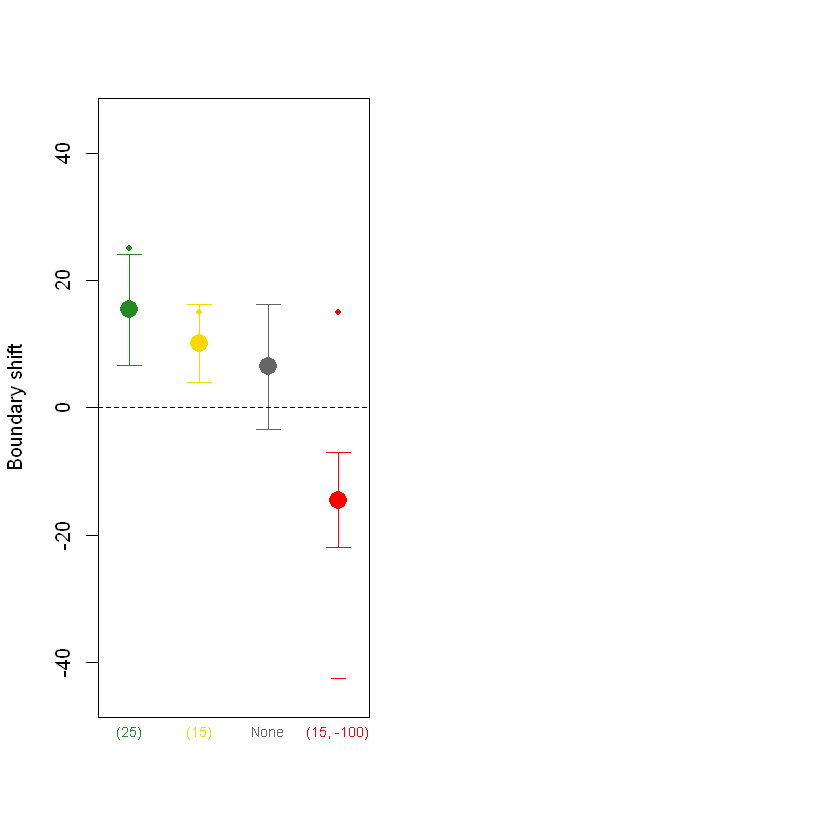

In [22]:
par(mfrow = c(1,2)) #Set plotting paramters for two columns so plot is skinny
plot.cis(o, pcol = c("forestgreen","gold","gray40","red"), y.lab = "Boundary shift", y.lim = c(-45,45)) #Plot data in o
points(c(1,2,4), c(25,15,15), pch = 16, cex = .7, col =c("forestgreen","gold","red") )  #Add points showing close source location
lines(c(3.9,4.1), c(-42.5, -42.5), col = "red") #Line segment showing midpoint between sources for two-source condition
abline(h=0, lty=2)  #No-shift line
mtext(side = 1, text=c("(25)", "(15)", "None", "(15, -100)"), at = c(1:4), 
      col = c("forestgreen","gold","gray40","red"), cex = .7) #condition labels on x axis

**Figure 1: Mean and 95% confidence intervals for boundary shift in Study 1.** Positive numbers indicate a shift toward the close source boundary. X-axis labels indicate the source boundary distances from the range midpoint, which for close sources are also plotted with a small dot. When there is only one source (green and yellow), boundaries shift reliably toward it and confidence limits on the amount of shift include the source distance from the midpoint. When no source information is provided (gray), the boundary does not shift. When a close and a far source appear (red), the boundary shifts reliably toward the far source, and differs significantly from all other conditions. The boundary does not, however, shift as far as the midpoint between sources, indicated by the red line segment.

### Additional analyses

For the one-source conditions, we can see if the distance between initial boundary and the source boundary predicts the amount of shift.

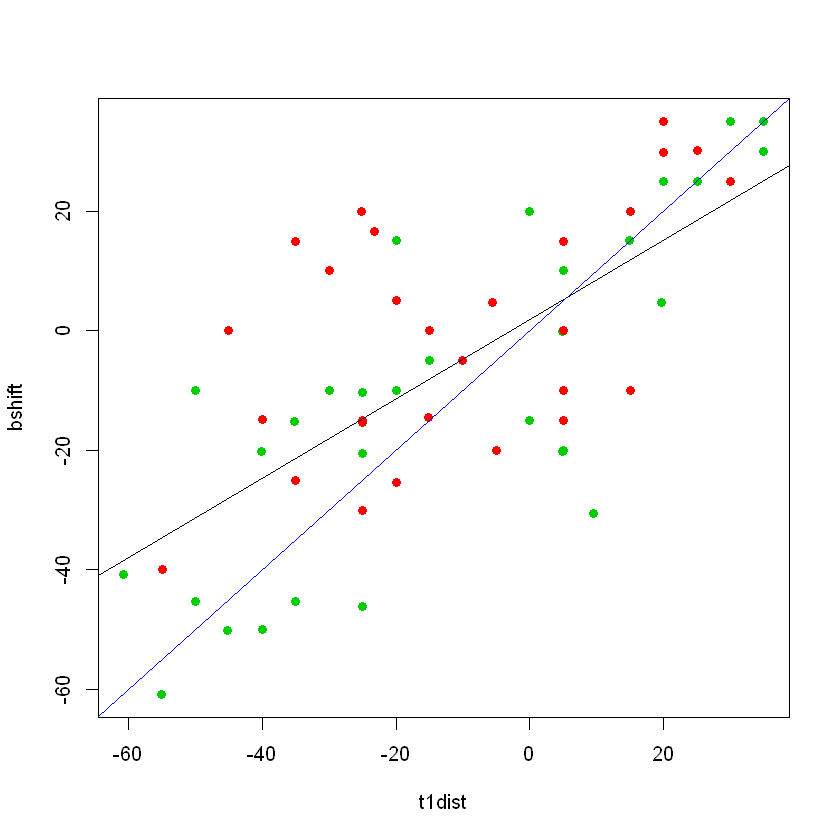

In [19]:
plot(bshift~t1dist, data = subset(noo, cond=="one15" | cond=="one25"), col = cond, pch=16)
m <- lm(bshift ~ t1dist, data = subset(noo, cond=="one15" | cond=="one25"))
abline(m$coefficients)
abline(0,1, col=4)

In [20]:
summary(m)


Call:
lm(formula = bshift ~ t1dist, data = subset(noo, cond == "one15" | 
    cond == "one25"))

Residuals:
    Min      1Q  Median      3Q     Max 
-38.717 -13.970   3.186   9.778  36.324 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.90216    2.40518   0.791    0.432    
t1dist       0.66372    0.08657   7.667 2.01e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.39 on 59 degrees of freedom
Multiple R-squared:  0.4991,	Adjusted R-squared:  0.4906 
F-statistic: 58.78 on 1 and 59 DF,  p-value: 2.007e-10


It does. The black line in the above scatterplot shows the least-squares regression line for all subjects. Red dots show those in the one-15 condition while green dots show those in the 1-25 condition. 

Our heuristic model assumes that learners move all the way to the source boundary--that is, the distance moved during learning will equal the distance between the initial and source boundaries when there is only one source. The blue line in the scatterplot shows what that slope would look like. It isn't too different from the best fit line. If we compute confidence limits on the slope:

In [21]:
confint(m,'t1dist', level=.95)

,2.5 %,97.5 %
t1dist,0.4904886,0.8369533


... we can see that the slope is less than one. An alternative learning model could use the predicted shift from this model, rather than the assumed shift of 1.

## Scratch

In [24]:
#read the merged no-outlier (noo) file from the independent analyses
noo <- read.csv("all_noo.csv", header = T)
head(noo)

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : no lines available in input


In [ ]:
dim(noo)
aggregate(alshift~cond, data = noo, FUN="length")

138 subjects, number in each condition shown above. We counterbalance (1) which side is labeled "raw", (2) which side the "close" source is on and (2) which face gets paired with which label. Fully crossing leads to 8 cells. We aim for 4-5 subjects in each cell, so expected 32-40 subjects per condition prior to outlier analysis.